Q1. Explain the fundamental differences between DDL, DML, and DQL
commands in SQL. Provide one example for each type of command.

-  DDL (Data Definition Language)

Purpose:
DDL commands are used to define, modify, or delete the structure of database objects such as tables, schemas, or indexes.

Key characteristics:

Works on database structure, not on data

Changes are usually auto-committed

Used during database design

Common DDL commands:
CREATE, ALTER, DROP, TRUNCATE

Example:

CREATE TABLE students (
    student_id INT,
    name VARCHAR(50),
    age INT
);


This creates a new table called students.

2. DML (Data Manipulation Language)

Purpose:
DML commands are used to insert, update, or delete data stored in database tables.

Key characteristics:

Works on table data

Changes can be rolled back (if transaction control is used)

Used in day-to-day database operations

Common DML commands:
INSERT, UPDATE, DELETE

Example:

INSERT INTO students VALUES (1, 'Rahul', 21);


 This inserts a new record into the students table.

3. DQL (Data Query Language)

Purpose:
DQL commands are used to retrieve data from database tables without modifying it.

Key characteristics:

Used only for data retrieval

Does not change database data

Most frequently used in data analytics

Common DQL command:
SELECT

Example:

SELECT name, age FROM students;


 This fetches the name and age of all students.

Q2. What is the purpose of SQL constraints? Name and describe three common types of constraints, providing a simple scenario where each would be useful.

- SQL constraints are rules applied to table columns to maintain data accuracy, consistency, and integrity in a database.
They prevent invalid data from being inserted, updated, or deleted, ensuring the database always stores reliable and meaningful data.

Three Common Types of SQL Constraints
1. PRIMARY KEY Constraint

Description:

Uniquely identifies each record in a table

Cannot contain NULL values

Ensures entity integrity

Scenario:
In a students table, each student must have a unique ID.

Example:

student_id INT PRIMARY KEY


Usefulness:
Prevents duplicate or missing student IDs.

2. NOT NULL Constraint

Description:

Ensures that a column cannot have empty (NULL) values

Mandatory data must always be provided

Scenario:
In an employee table, every employee must have a name.

Example:

employee_name VARCHAR(50) NOT NULL


Usefulness:
Prevents records with missing employee names.

3. UNIQUE Constraint

Description:

Ensures all values in a column are different

Allows NULL values (usually only one, depending on DBMS)

Scenario:
In a users table, each user must have a unique email address.

Example:

email VARCHAR(100) UNIQUE


Usefulness:
Prevents duplicate email registrations.

Q3.  Explain the difference between LIMIT and OFFSET clauses in SQL. How would you use them together to retrieve the third page of results, assuming each page has 10 records?

-  Both LIMIT and OFFSET are used to control how many rows are returned and from which position in a result set. They are commonly used for pagination.

1. LIMIT

Purpose:
Specifies the maximum number of rows to return.

Example:

SELECT * FROM employees
LIMIT 10;

 Returns only the first 10 records.

2. OFFSET

Purpose:
Specifies the number of rows to skip before starting to return rows.

Example:

SELECT * FROM employees
OFFSET 10;

 Skips the first 10 records and returns the rest.

- Using LIMIT and OFFSET Together (Pagination)
Problem:

Retrieve the third page of results, where:

Each page has 10 records

Step-by-step logic:

Page 1 → skip 0 rows

Page 2 → skip 10 rows

Page 3 → skip 20 rows

SQL Query:
SELECT * FROM employees
LIMIT 10 OFFSET 20;


Q4.  What is a Common Table Expression (CTE) in SQL, and what are its main benefits? Provide a simple SQL example demonstrating its usage.

- A Common Table Expression (CTE) is a temporary, named result set that you define using the WITH keyword and then use within a single SQL query.
It helps break down complex queries into simpler, more readable parts.

Main Benefits of Using CTEs
1. Improves Readability

Makes complex queries easier to understand

Replaces deeply nested subqueries

2. Better Query Organization

Allows you to write queries in logical steps

Easy to debug and maintain

3. Reusability Within a Query

A CTE can be referenced multiple times in the same query

4. Supports Recursive Queries

Useful for hierarchical data (e.g., employee–manager relationships)

Example:- WITH avg_salary AS (
    SELECT AVG(salary) AS avg_sal
    FROM employees
)
SELECT *
FROM employees
WHERE salary > (SELECT avg_sal FROM avg_salary);

Q5.  Describe the concept of SQL Normalization and its primary goals. Briefly explain the first three normal forms (1NF, 2NF, 3NF).

- Normalization in SQL is the process of organizing data in a database to reduce data redundancy and improve data integrity.
It involves dividing large tables into smaller, related tables and defining relationships between them.

Primary Goals of Normalization

- Eliminate data redundancy (duplicate data)

- Ensure data consistency and accuracy

- Avoid update, insert, and delete anomalies

- Improve database structure and maintenance

First Three Normal Forms
1. First Normal Form (1NF)

Rule:

Each column must contain atomic (indivisible) values

No repeating groups or multi-valued attributes

Each record must be uniquely identifiable

2. Second Normal Form (2NF)

Rule:

Table must already be in 1NF

No partial dependency
(Non-key attributes should depend on the entire primary key)

3. Third Normal Form (3NF)

Rule:

Table must already be in 2NF

No transitive dependency
(Non-key attributes should not depend on other non-key attributes)

 Q6. Create a database named ECommerceDB and perform the following
tasks:
1. Create the following tables with appropriate data types and constraints:
 Categories
 CategoryID (INT, PRIMARY KEY)
 CategoryName (VARCHAR(50), NOT NULL, UNIQUE)
2. Products
 ProductID (INT, PRIMARY KEY)
 ProductName (VARCHAR(100), NOT NULL, UNIQUE)
CategoryID (INT, FOREIGN KEY → Categories)
 Price (DECIMAL(10,2), NOT NULL)
 StockQuantity (INT)
3. Customers
 CustomerID (INT, PRIMARY KEY)
 CustomerName (VARCHAR(100), NOT NULL)
 Email (VARCHAR(100), UNIQUE)
 JoinDate (DATE)
4. Orders
OrderID (INT, PRIMARY KEY)
 CustomerID (INT, FOREIGN KEY → Customers)
 OrderDate (DATE, NOT NULL)
 TotalAmount (DECIMAL(10,2))
. Insert the following records into each table  */

- CREATE DATABASE ECommerceDB;
USE ECommerceDB;

CREATE TABLE Categories (
CategoryID INT PRIMARY KEY,
CategoryName VARCHAR(50) NOT NULL UNIQUE
);

CREATE TABLE Products (
ProductId INT PRIMARY KEY,
ProductName VARCHAR(100) NOT NULL UNIQUE,
CategoryID INT,
Price DECIMAL(10,2) NOT NULL,
StockQuantity INT,
FOREIGN KEY(CategoryID) REFERENCES
Categories(CategoryID)
);

CREATE TABLE Customers (
CustomerID INT PRIMARY KEY,
CustomerName VARCHAR(100) NOT NULL,
Email VARCHAR(100) UNIQUE,
JoinDate DATE
);

CREATE TABLE Orders (
OrderID INT PRIMARY KEY,
CustomerID INT REFERENCES Customers(CustomeerID),
OrderDate DATE NOT NULL,
TotalAmount DECIMAL(10,2) NOT NULL
);

USE ECommerceDB;
INSERT INTO Categories (CategoryID, CategoryName) VALUES
(1, 'Electronics'),
(2, 'Books'),
(3, 'Home Goods'),
(4, 'Apparel');

INSERT INTO Products (ProductID, ProductName, CategoryID, Price, StockQuantity) VALUES
(101, 'Laptop Pro', 1, 1200.00, 50),
(102, 'SQL Handbook', 2, 45.50, 200),
(103, 'Smart Speaker', 1, 99.99, 150),
(104, 'Coffee Maker', 3, 75.00, 80),
(105, 'Novel: The Great SQL', 2, 25.00, 120),
(106, 'Wireless Earbuds', 1, 150.00, 100),
(107, 'Blender X', 3, 120.00, 60),
(108, 'T-Shirt Casual', 4, 20.00, 300);

INSERT INTO Customers (CustomerID, CustomerName, Email, JoinDate) VALUES
(1, 'Alice Wonderland', 'alice@example.com', '2023-01-10'),
(2, 'Bob the Builder', 'bob@example.com', '2022-11-25'),
(3, 'Charlie Chaplin', 'charlie@example.com', '2023-03-01'),
(4, 'Diana Prince', 'diana@example.com', '2021-04-26');

INSERT INTO Orders (OrderID, CustomerID, OrderDate, TotalAmount) VALUES
(1001, 1, '2023-04-26', 1245.50),
(1002, 2, '2023-10-12', 99.99),
(1003, 1, '2023-07-01', 145.00),
(1004, 3, '2023-01-14', 150.00),
(1005, 2, '2023-09-24', 120.00),
(1006, 1, '2023-06-19', 20.00);

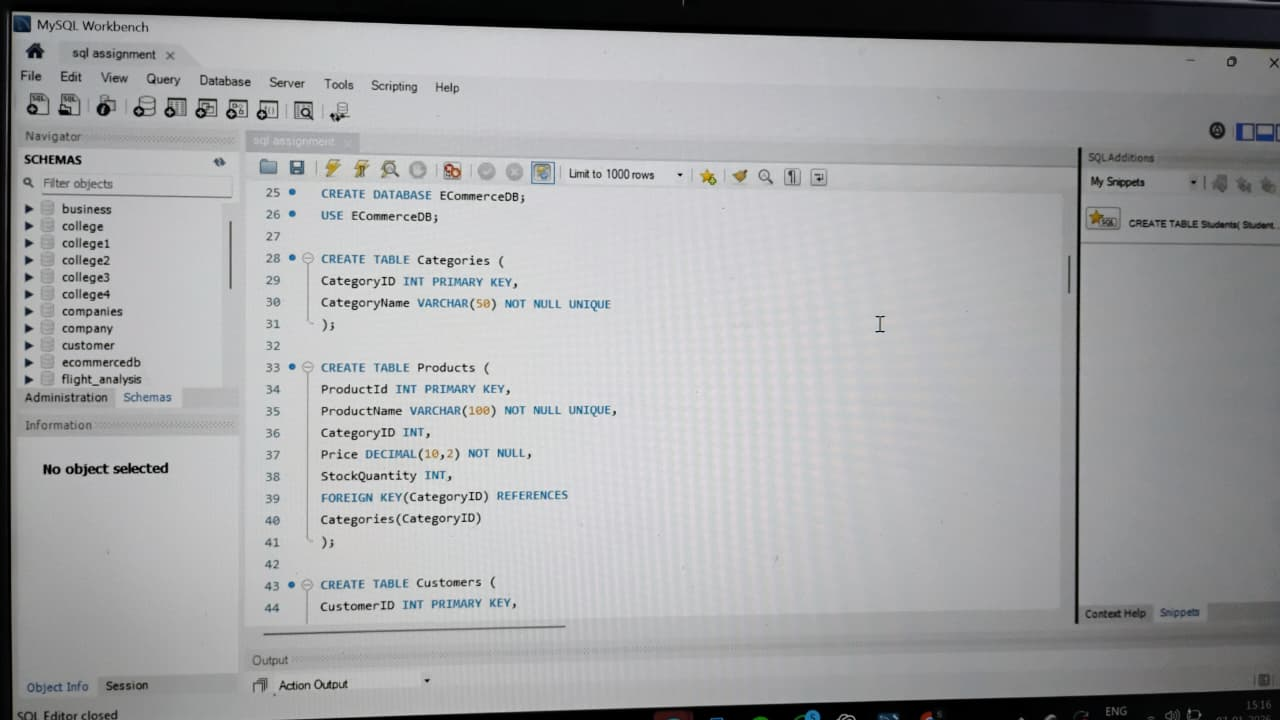

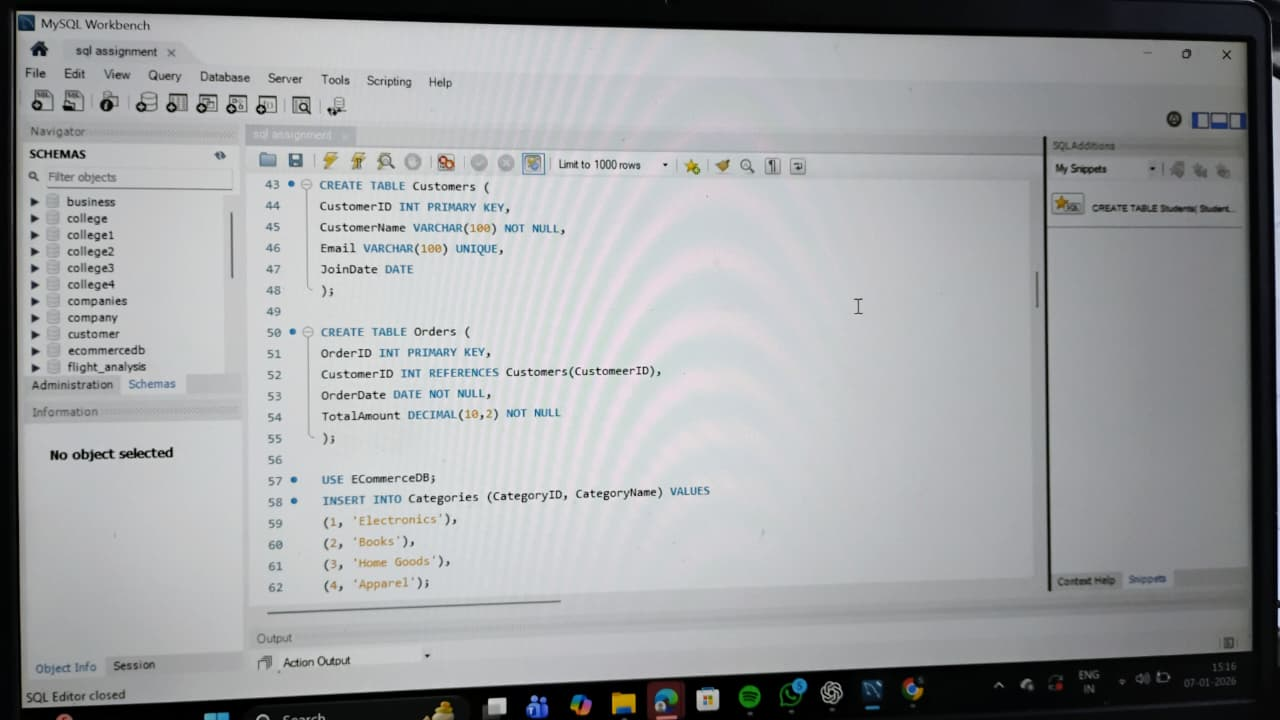

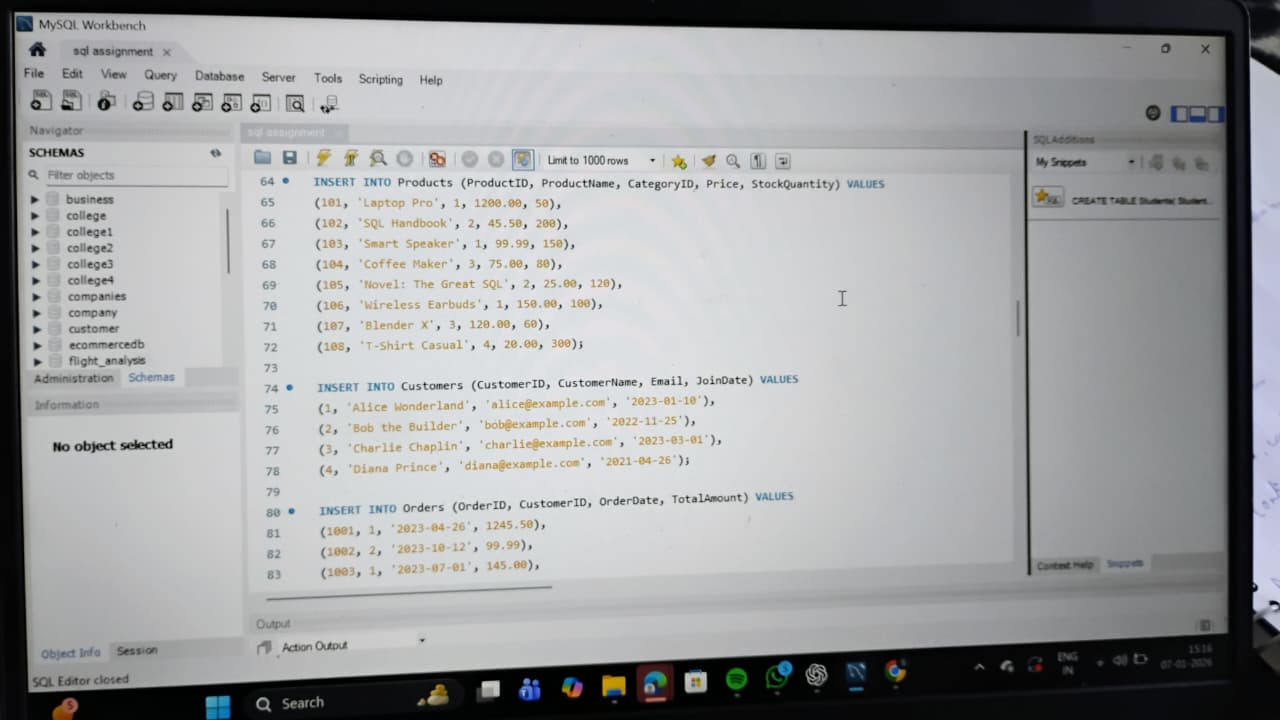

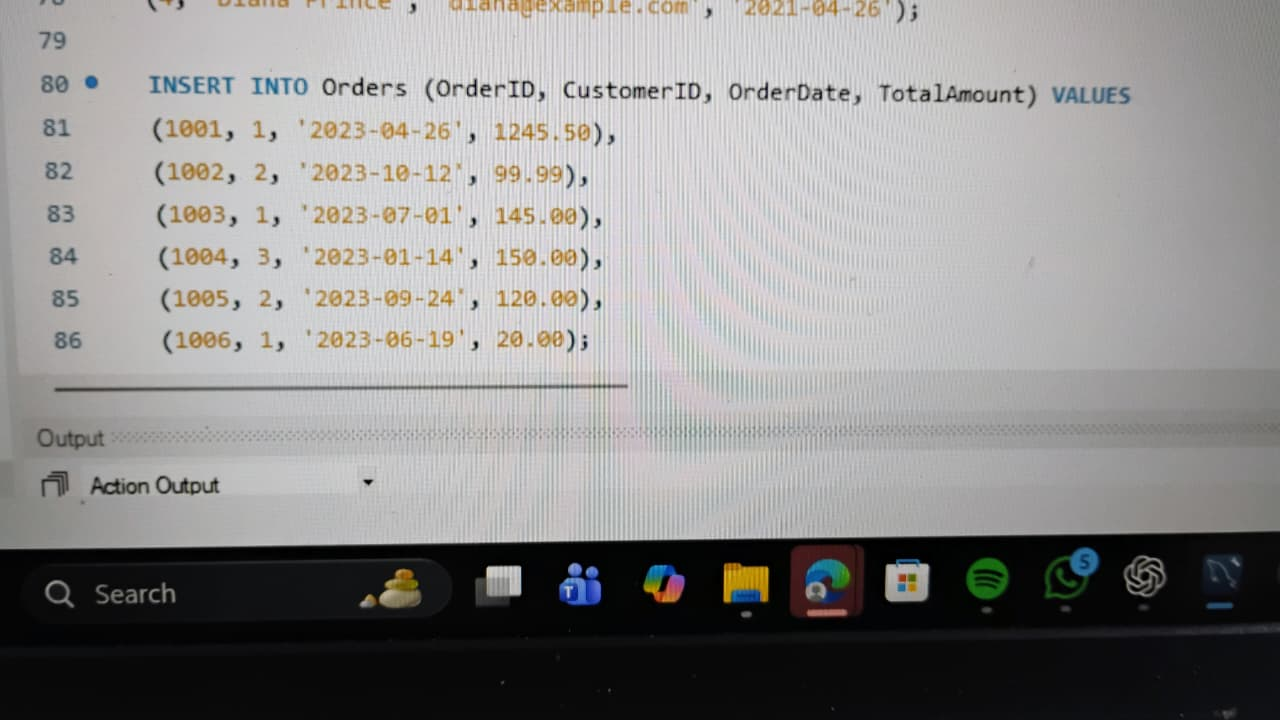

/* Q7 Generate a report showing CustomerName, Email, and the
 TotalNumberofOrders for each customer. Include customers who have not placed
 any orders, in which case their TotalNumberofOrders should be 0. Order the results
 by CustomerName.*/

SELECT CustomerName, Email, count(OrderID) as TotalNumberofOrders
FROM Customers c LEFT JOIN  orders o
ON c.CustomerID = o.CustomerID
GROUP BY c.customerID;

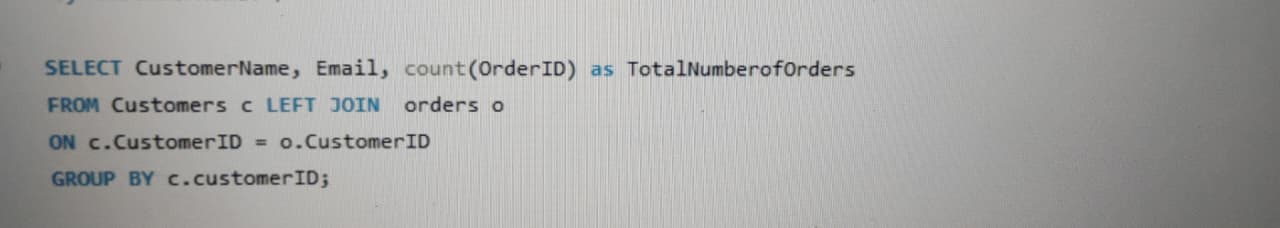

/* Q8  Retrieve Product Information with Category: Write a SQL query to
 display the ProductName, Price, StockQuantity, and CategoryName for all
 products. Order the results by CategoryName and then ProductName alphabetically.*/


SELECT ProductName,Price,StockQuantity,CategoryName
FROM Products p INNER JOIN Categories c
ON p.CategoryID = c.CategoryID
ORDER BY CategoryName, ProductName;

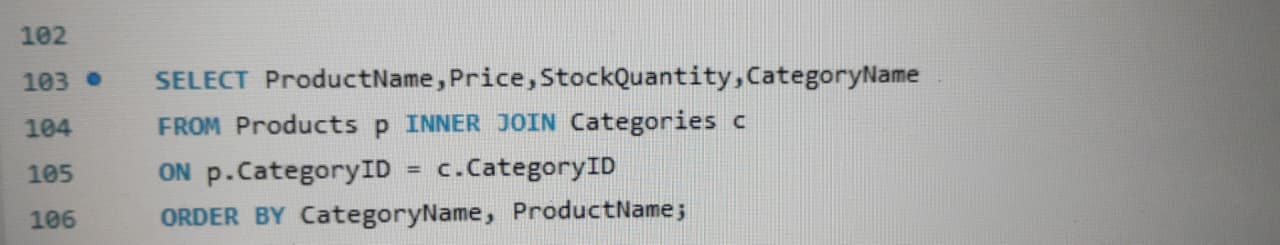

-- Q9 Write a SQL query that uses a Common Table Expression (CTE) and a
-- Window Function (specifically ROW_NUMBER() or RANK()) to display the
-- CategoryName, ProductName, and Price for the top 2 most expensive products in
-- each CategoryName.

WITH RankedProducts AS (
SELECT
c.CategoryName,
p.ProductName,
p.Price,
ROW_NUMBER() OVER (
PARTITION BY c.CategoryName ORDER BY p.Price DESC) AS rn
FROM Products p
JOIN Categories c
ON p.CategoryID = c.CategoryID)
SELECT CategoryName, ProductName, Price
FROM RankedProducts
WHERE rn <= 2;

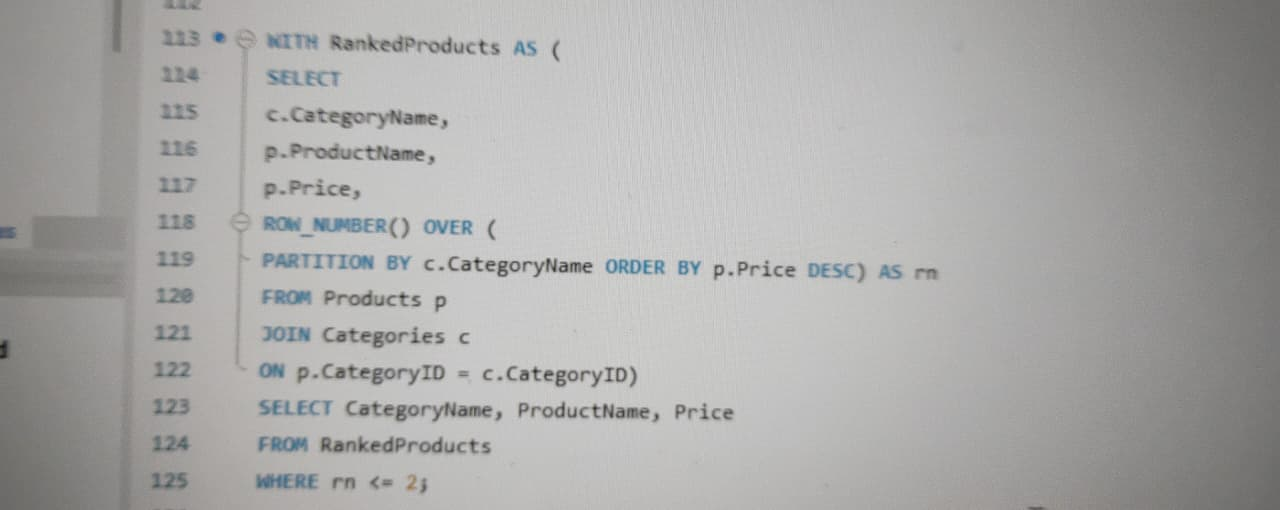

/* Q10   You are hired as a data analyst by Sakila Video Rentals, a global movie
rental company. The management team is looking to improve decision-making by
analyzing existing customer, rental, and inventory data.
Using the Sakila database, answer the following business questions to support key strategic
initiatives.
Tasks & Questions:
1. Identify the top 5 customers based on the total amount they’ve spent. Include customer
name, email, and total amount spent. */

USE Sakila;

SELECT
    c.customer_id,
    CONCAT(c.first_name, ' ', c.last_name) AS customer_name,
    c.email,
    SUM(p.amount) AS total_spent
FROM customer c
JOIN payment p
    ON c.customer_id = p.customer_id
GROUP BY c.customer_id, customer_name, c.email
ORDER BY total_spent DESC
LIMIT 5;

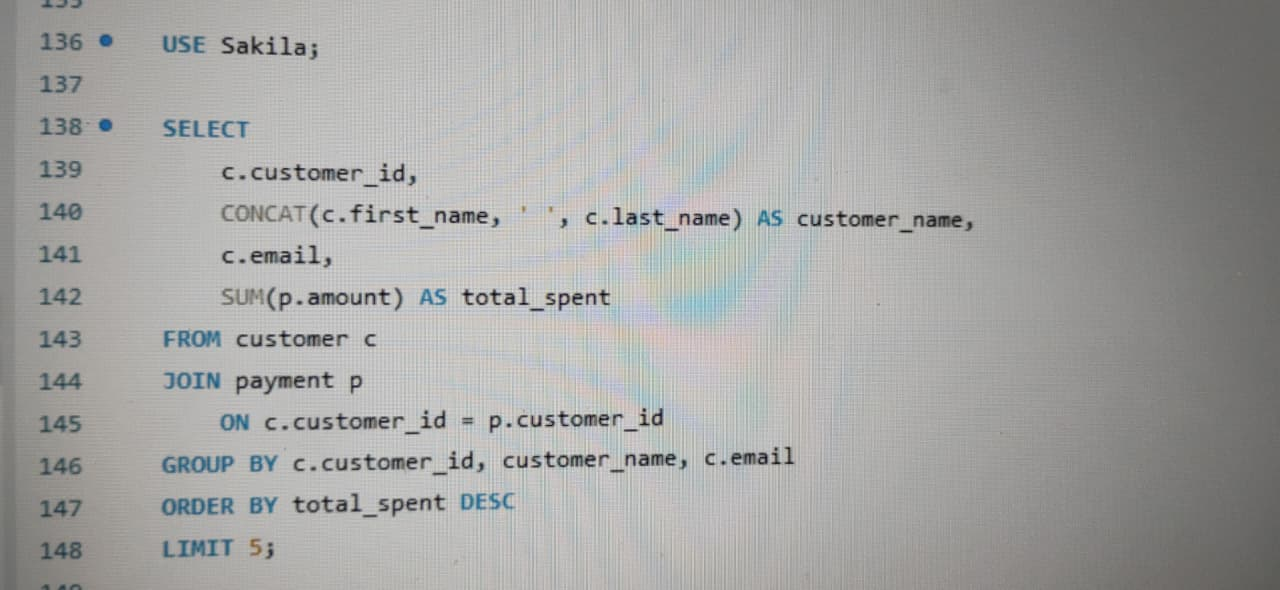

/* 2. Which 3 movie categories have the highest rental counts? Display the category name
and number of times movies from that category were rented. */

SELECT
    cat.name AS category_name,
    COUNT(r.rental_id) AS rental_count
FROM category cat
JOIN film_category fc ON cat.category_id = fc.category_id
JOIN inventory i ON fc.film_id = i.film_id
JOIN rental r ON i.inventory_id = r.inventory_id
GROUP BY cat.name
ORDER BY rental_count DESC
LIMIT 3;

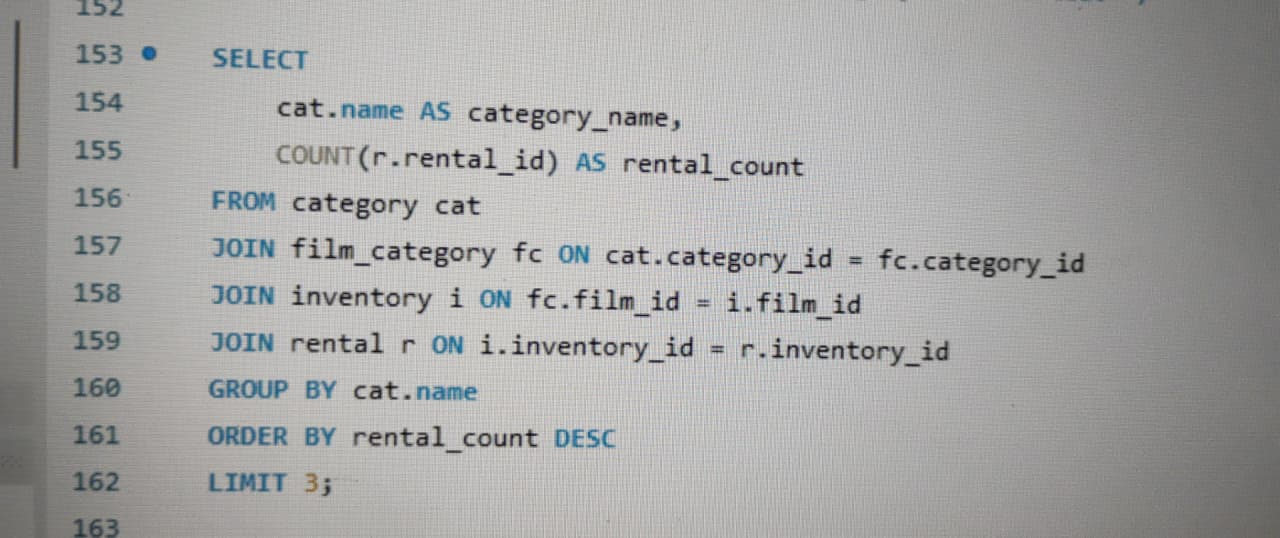

/* 3.  Calculate how many films are available at each store and how many of those have
never been rented. */

SELECT
    i.store_id,
    COUNT(i.inventory_id) AS total_films,
    SUM(CASE WHEN r.rental_id IS NULL THEN 1 ELSE 0 END) AS never_rented
FROM inventory i
LEFT JOIN rental r
    ON i.inventory_id = r.inventory_id
GROUP BY i.store_id;

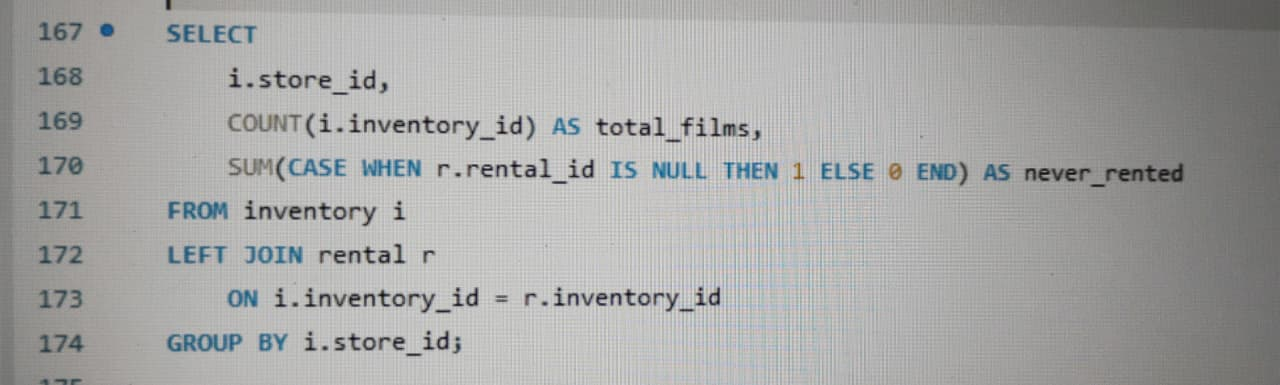

/* 4. Show the total revenue per month for the year 2023 to analyze business seasonality.*/

SELECT
    DATE_FORMAT(payment_date, '%Y-%m') AS Month,
    SUM(amount) AS TotalRevenue
FROM payment
WHERE YEAR(payment_date) = 2023
GROUP BY DATE_FORMAT(payment_date, '%Y-%m')
ORDER BY Month;

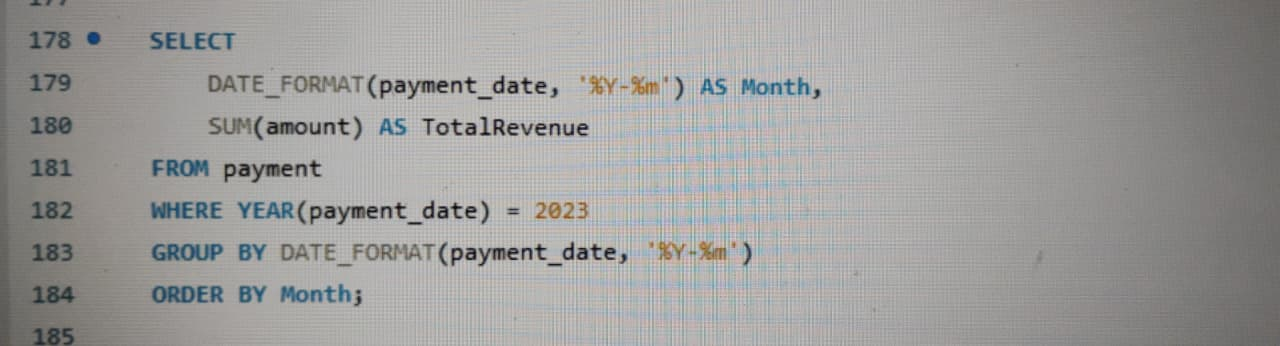

/* 5. Identify customers who have rented more than 10 times in the last 6 months. */

SELECT
c.customer_id,
c.first_name,
c.last_name,
COUNT(r.rental_id) AS TotalRentals
FROM customer c
JOIN rental r
ON c.customer_id = r.customer_id
WHERE r.rental_date >= DATE_SUB(CURDATE(), INTERVAL 6 MONTH)
GROUP BY c.customer_id, c.first_name, c.last_name
HAVING COUNT(r.rental_id) > 10
ORDER BY TotalRentals DESC;

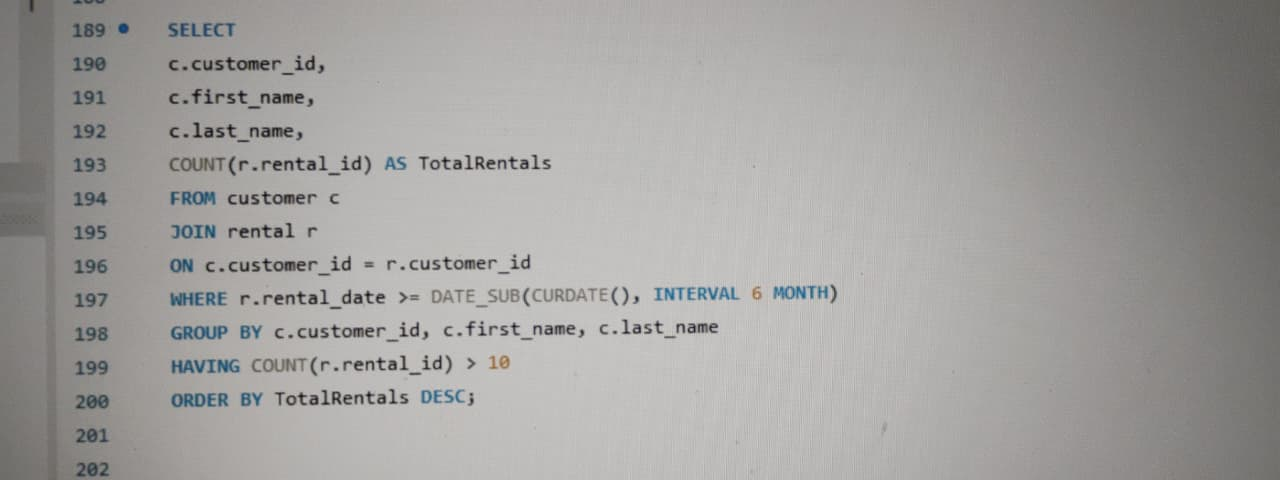
    